# Kafka Producer for Streaming Ingestion with kafka-python client


In [ ]:
# install necessary libraries 
# I will use kafka-python client to replicate original kfka Java client functionality
# requirements: zookeeper deamons on, kafka broker is on, Producer and Consumer being tested and UP

# Pyspark is installed for subsequent usage for some transormations, manipulations or functions, as well as pandas and numpy

# Ydata Profiling is an automed EDA tool which can allow us to generate a custom HTML report:
# I would like to assess the data quality of this batch with respect to : anomaly detection, correlation an collinearity,
# Missing patterns ( MCAR, MNAR, MAR) via missing heatmaps spectrum, data visulization of KDE for each contonuous variable and Bar chart
# for eacg categorical variable; plus some descriptive statistics ( ewuivalent to df.dessribe.T)
!pip install kafka-python
!pip install pyspark
!pip install ydata-profiling

In [ ]:
# I have to make sure that our kafka cluster is up and running and test the consumer and producers as in here;
# Kafka Broker UP, Zookeeper deamon UP, And tested producer and consumer clients succesfully with some simple text messages

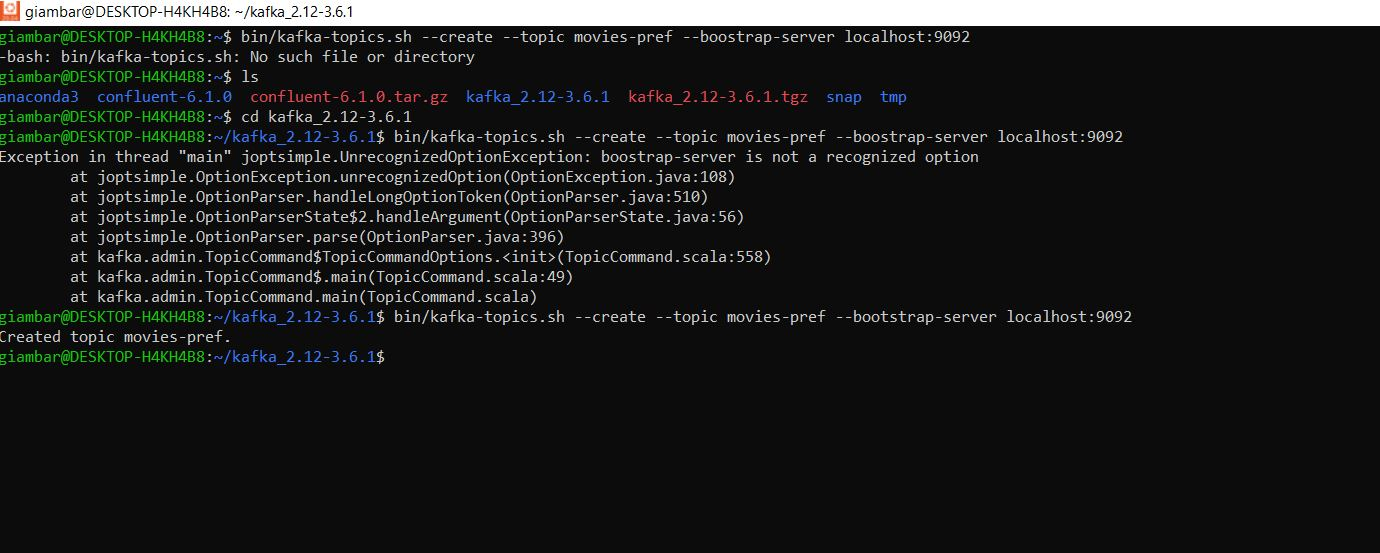

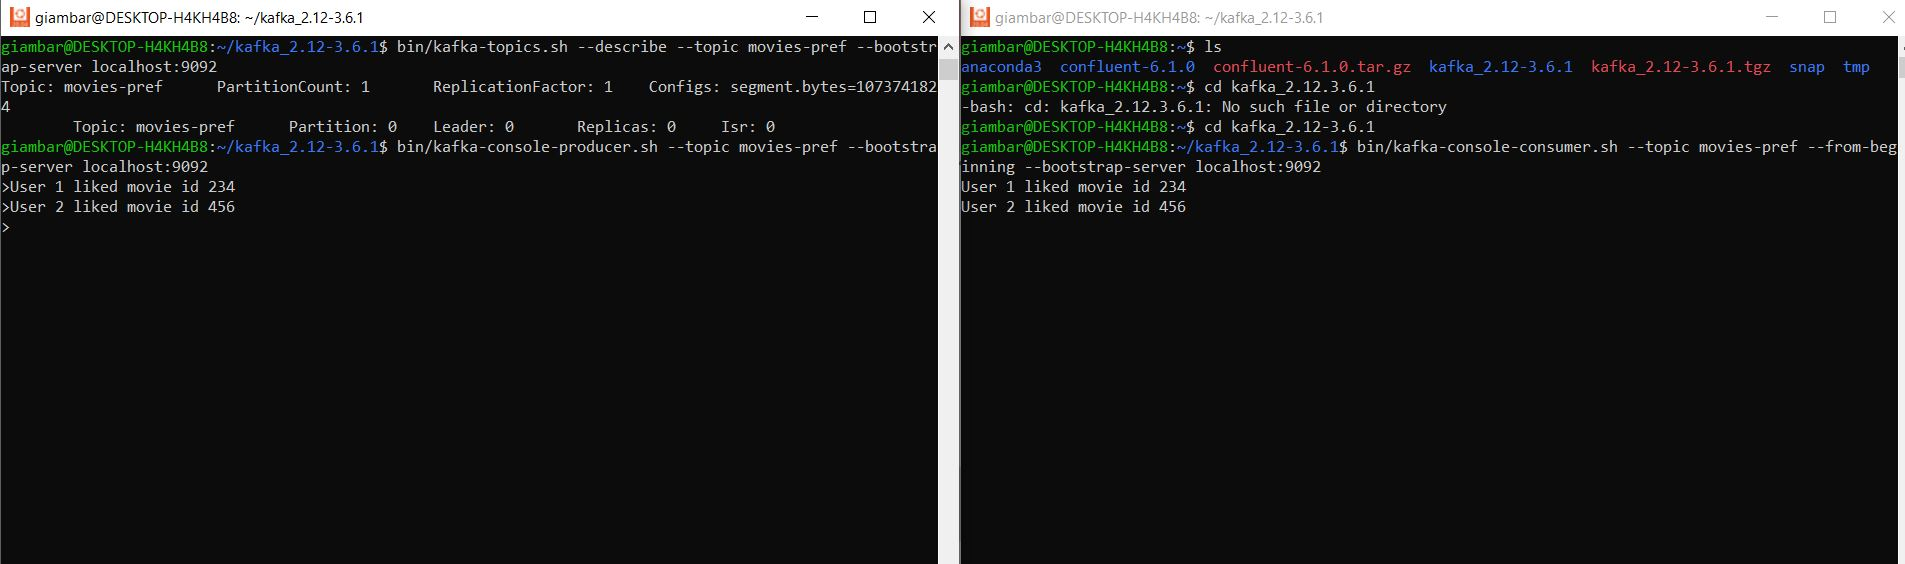

In [ ]:
#ist the necessary imports
# time is necessary to then implement the 'sleep' and 'timeout' API in the 'send ' and the flush methods to
# Simulate the streaming scenario ( we can view it as an unending incremental append to a tabular data structure)
import time
import pandas as pd
import numpy as np
import json
from pandas_profiling import ProfileReport

# this two objects are Classes of kafka-python client to instantiate a Pub/Sub schema fro the message broker
# The consumer subscribe to a partitioned Topic and reads streams coming from it
# The producer produces (generates) streams into the topic being then patitioned ( we can control the partitions or let kafka cluster do the job with default configurations)
from kafka import KafkaConsumer, KafkaProducer

In [ ]:
# read the .csv file ; I will treat each row of this file as coming from
# an unbounded streaming of events as if it was streamed from a web App or an IoT device reading movies' ratings

# ASSUMPTION: I am using the MovieLens20M dataset from renowned Kaggle competitions; I will choose to only leverage the infomration being contained into the 'ratings' file
# for the sake of simplicity in this POC

df = pd.read_csv('rating.csv')

df.head(3)

# AS we can see the dataset is has got:
# UserId column, pointing at the User Info, an identifier for the movie watched, a rating expressed by the User, a timestamp column
# As I have chosen to use Spark ( Pyspark API) to do the Consumer Object int the streaming pipeline and chosen MLib to conduct
# algorithmically an experiment for recommendign movies to users, I will leverage ASL ( 'Alternated Least Squares') Collaborative filtering technique ( which is the only one availbale in pysparl ml class as the time of this POC)

In [ ]:
df.info()

In [ ]:
#generate a Transpose of the summary statistics for each numerical variable
# we see that the df is a 20000263 sample size X 3 features matrix;
# we can observe that at the 75th percentile the rating is quite high only having less than 25th percentile individuals expressing low recommendation rating
# mean rating being 3.525529.

df.describe().T

In [ ]:
# instanting a Profile Objetc to inevstigate EDA task
# from the HTML report no missingness, nothing to spot about colinearity or particular correlation issues here
profile = ProfileReport(df, title="Profiling Report for the ratings movie recommender system task")

In [ ]:
# create a Serializer that reads in CSV values and streams out JSON objects
df_json = df. to_json(orient='records')

df_json

In [ ]:
#we set global variable to indicate which Topic the kafka-python client
#has to publish the contents
KAFKA_TOPIC_NAME = "movies-pref"
#global variable to establish the server connection; in our standalone kafka cluster configuration
# the port is listening on localhost:9092 boostrap-server

KAFKA_BOOTSTRAP_SERVER_CONN = "localhost:9092"

# we instantiate a KafkaProducer reference variable with our bootrasrp server port
# and we set value serializer; this allows our producer to encode to utf-8 a bit-based information
#it is important to echo the kafka_producer object to avoid Exception 'NoBrokersAvailable'
# in our case everything is perfectly working with : <kafka.producer.kafka.KafkaProducer at 0x21e5bd590d0> thi object at this memory location
kafka_producer = KafkaProducer(bootstrap_servers=KAFKA_BOOTSTRAP_SERVER_CONN,
              value_serializer=lambda x: json.dumps(x).encode('utf-8'))

#df_json = pd.read_json("df_movies.json")
# I have transormed the data into a dictionary data structure
message_list = json.loads(df_json)

# I have created an iteration loop that implemets two APIs of the KafkaProducer Class:
# send and flush; flush forces the sending even if we have no aknowlegment guarantee, and I have implemented it
# to have the delivery of messages to the partitions avoiding asyncornous delays;
kafka_dict = dict()

for message in message_list:
    print("Message to be send : ", movie)
    kafka_dict['userId'] = message['userId']
    kafka_dict['movieId'] = message['movieId']
    kafka_dict['rating'] = message['rating']
    kafka_dict['timestamp'] = message['timestamp']
    
    kafka_producer.send(KAFKA_TOPIC_NAME, json.dumps(kafka_data).encode('utf-8'))
    kafka_producer.flush()
    # this time API is invoked to simulate the streaming source of a web App; we create the delay
    # and every 1/10th of second an input vector of information is sent to the Topic and partition of destination
    time.sleep(0.1)

In [ ]:
# The cell below has been added only for testing purpose: avoiding NoBrokersAvailable and always test the connection to Kafka Clusters
# test if zookeeper and kafka deamons and up and running.

In [ ]:
#we set global variable to indicate which Topic the kafka-python client
#has to publish the contents
KAFKA_TOPIC_NAME = 'movies-pref'
#global variable to establish the server connection; in our standalone kafka cluster configuration
# the port is listening on localhost:9092 boostrap-server

KAFKA_BOOTSTRAP_SERVER_CONN = 'localhost:9092'

# we instantiate a KafkaProducer reference variable with our bootrasrp server port
# and we set value serializer; this allows our producer to encode to utf-8 a bit-based information
kafka_producer = KafkaProducer(bootstrap_servers=KAFKA_BOOTSTRAP_SERVER_CONN,
              value_serializer=lambda x: json.dumps(x).encode('utf-8'))


In [ ]:
kafka_producer

In [ ]:
# Our application sends all the messages to our Topic movies-pref and store them resiliently (durability) and with fault tolerane and HA guarantess in the kafka cluster

# Spark Streaming Consumer

In [ ]:
#import all nevessary libraries and dependencies
# pyspark is python Spark API for Massive Parallel Processing
# Spark Session is 'the entry point' for any subsequent computation

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [ ]:
# Here we declare hosts and ports to soncume form Kafka Client Topic we have subscribed to

kafka_topic_name = "movies-pref"
kafka_bootstrap_servers = "localhost:9092"

# important is setting the .jars dependecies and pakages to avoid errors
# we set pur scala version, spark vrsion and we declare our kafka standalone cluster version (here 3.6.1)
scala_version = '2.12.18'
spark_version = '3.5.0'


packages = [
    f'org.apache.spark:spark-sql-kafka-0-10_{scala_version}:{spark_version}',
    'org.apache.kafka:kafka-clients:3.6.1'
]
# spark is the entry point of any spark application; the spark object is bulit and created; 
# with a very elegant syntax we can use DataFrame API language absttraction to operate on streams from a variety of sources;
# here we have set the master os being local standalone (on one machine installation with the cores CPUs of the hardware available)
# I will discuss sclaing out clusters and nodes later, ina  Kubernetes Orchestration mode.
spark = SparkSession \
        .builder \
        .master("local")\
        .appName("Structured Streaming for th Movie Recommender System ") \
        .config("spark.jars.packages", ",".join(packages))\
        .getOrCreate()
#spark
# when we echo spark the spark UI 3.5.0 appears allowing us to control RDDs, Jobs, clusters, failures and to the debug queries via DAGs..

In [ ]:
# Here we make usage of the ìreadStream' Api thus retrieving in a streaming fashion all the messages from the kafka broker Topic
# we have set the startingOffsets to earlier, we can change to latest at our heartìs convenience based on the case;
# this is important in case of any failure being able to recover and reding from the partition offsett we desire.
movie_streaming_df = spark.readStream\
    .format("kafka") \
    .option("kafka.bootstrap.servers", "kafka:29092") \
    .option("subscribe", "movies-pref") \
    .option("startingOffsets", "earliest") \
    .load()

In [ ]:
# the schema on reading the stream is like this:
#into the value object of the root we have our data values, so we have to manipulate and unnest this structure to be able to recover
# our desired schema ( we will be plugging in the schema 'manually')
# all the othe data points are only metadata relative to the kafka topic object

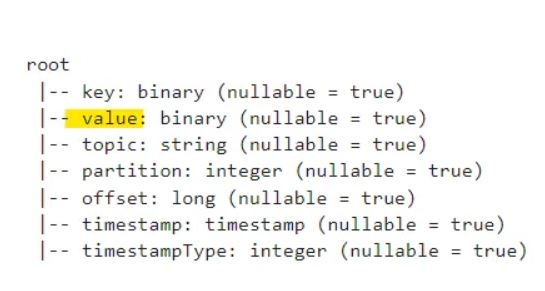

In [ ]:
# Svhema imports 
from pyspark.sql.types import StringType, StructField, StructType, LongType, TimestampType

# we here set our schema upfront to have our original data types in plave ( we have aonly three numeric LOng Varibales)
# we can accomplish this task by using StructTypes and StructFiled data structures along with their wrappers for
# Ling, String etc data types.

json_schema = StructType([StructField('userId', LongType(), True), \
StructField('movieId', LongType(), True),\
StructField('rating', LongType(), True), \
StructField('timestamp', TimestampType(), True)])

# we have to  parse the value column as it contains of data points values from binary to string

json_movie = movie_streaming_df.selectExpr("cast(value as string) as value")

# Apply my Schema to JSON value column and explode (unwind) the values in there..

from pyspark.sql.functions import from_json

json_exp_movie_df = json_movie.withColumn("value", from_json(json_movie["value"], json_schema)).select("value.*") 

#then simply read the df with our schema object

# Lets drop  the timestamp column for subsuquent ASL ML algo fitting
from pyspark.sql.functions import col

final_df = json_exp_movie_df \
    .select("userId", "movieId", "rating", "timestamp") \
    .drop("timestamp")


In [ ]:
# Optional step: to simulate the effect of streaming we can build a temporary view and append the rows, checking the incremental count

final_df.createOrReplaceTempView("movies_stream_table");
table_movies = spark.sql("SELECT * movies_stream_table")

movies_write_stream = table_movies \
        .writeStream \
        .trigger(processingTime ='7 seconds') \
        .outputMode("append") \
        .option("truncate", "false") \
        .format("memory") \
        .queryName("movieStreamTable") \
        .start()

movies_write_stream.awaitTermination(1)

In [ ]:
# simple query

df = (spark.sql("SELECT * movieStreamTable"))



In [ ]:
df_count = df.count()
df_count

In [ ]:
df_count = df.count()
df_count

In [ ]:
# we can incrementally see samples coming in...

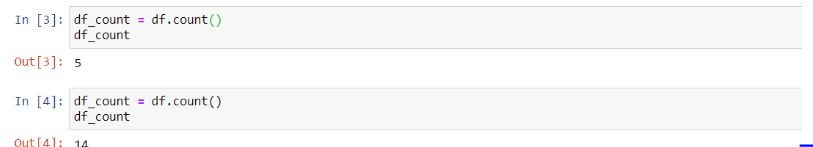

In [ ]:
# Optional step 2, for test and debugging purposes..

# I use the console as a testing device to evaluate my output leveraging th writeStream API

console_df = final_df.writeStream \
    .format("console") \
    #.option("checkpointLocation","checkpoint_dir") \
    .outputMode("complete") \
    .start()
    
# early stopping triggered by an event.
console_df.awaitTermination(1)